### Datasets
- [Neighborhood Statistical Areas](https://portal-nolagis.opendata.arcgis.com/datasets/neighborhood-statistical-areas?geometry=-90.539%2C29.917%2C-89.229%2C30.125)
- [Parks Polygon](https://portal-nolagis.opendata.arcgis.com/datasets/parks-polygon?geometry=-90.682%2C29.878%2C-89.371%2C30.086)
- [City of New Orleans Essential Restaurants Locations](https://portal-nolagis.opendata.arcgis.com/datasets/restaurants?geometry=-100.153%2C29.004%2C-89.672%2C30.672)
- [Hospitals](https://portal-nolagis.opendata.arcgis.com/datasets/hospitals?geometry=-90.642%2C29.883%2C-89.332%2C30.091)
- [Gas Stations](https://portal-nolagis.opendata.arcgis.com/datasets/gas-stations?geometry=-90.653%2C29.926%2C-89.343%2C30.134)
- [Bike Lanes](https://portal-nolagis.opendata.arcgis.com/datasets/bike-lanes?geometry=-90.374%2C29.928%2C-89.719%2C30.032)
- [Lake Pontchartrain Shoreline](https://pubs.usgs.gov/of/1998/of98-805/html/gismeta.htm)

In [1]:
import geoplot as gplt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
epsg = 4289
projectioncode = "EPSG:%d" % epsg
neighborhoodDf = gpd.read_file('zip://./input/Neighborhood_Statistical_Areas.zip!Neighborhood_Statistical_Areas.shp').to_crs(epsg=epsg)
neighborhoodDf['Name'] = neighborhoodDf['GNOCDC_LAB'].map(lambda x: x.title().replace(' ',"\n").split('-')[0])

In [3]:
parksDf = gpd.read_file('zip://./input/Parks_-_Polygon.zip!Parks_-_Polygon.shp').to_crs(epsg=epsg)

In [4]:
restaurantsDf = gpd.read_file('zip://./input/Restaurants.zip!Restaurants.shp').to_crs(epsg=epsg)

In [5]:
hospitalsDf = gpd.read_file('zip://./input/Hospitals.zip!Hospitals.shp').to_crs(epsg=epsg)

In [6]:
gasStationsDf = gpd.read_file('zip://./input/Gas_Stations.zip').to_crs(epsg=epsg)

In [7]:
schoolsDf = gpd.read_file('zip://./input/Schools.zip!Schools.shp').to_crs(epsg=epsg)

In [8]:
bikeLanesDf = gpd.read_file('zip://./input/Bike_Lanes.zip!Bike_Lanes.shp').to_crs(epsg=epsg)

In [9]:
waterDf = gpd.read_file('zip://./input/water.zip!WATER2.SHP')

In [10]:
webproj = False

crscode = 3395 if not webproj else 3857
neighborhoodDf['centers'] = neighborhoodDf['geometry'].centroid.to_crs(crscode)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In [11]:
neighborhoodDf.head(2)

,OBJECTID,GNOCDC_LAB,Shape_Leng,Shape_Area,geometry,Name,centers
0,1009,U.S. NAVAL BASE,24814.676237,2.965424e+07,"POLYGON ((-90.02667 29.95320, -90.02546 29.952...",U.S.\nNaval\nBase,POINT (-10021110.333 3476018.762)
1,1010,ALGIERS POINT,15434.791720,1.375080e+07,"POLYGON ((-90.04537 29.95810, -90.04558 29.955...",Algiers\nPoint,POINT (-10023950.792 3476768.210)


Extent: (-90.14003111, 29.86560481, -89.87, 30.08)


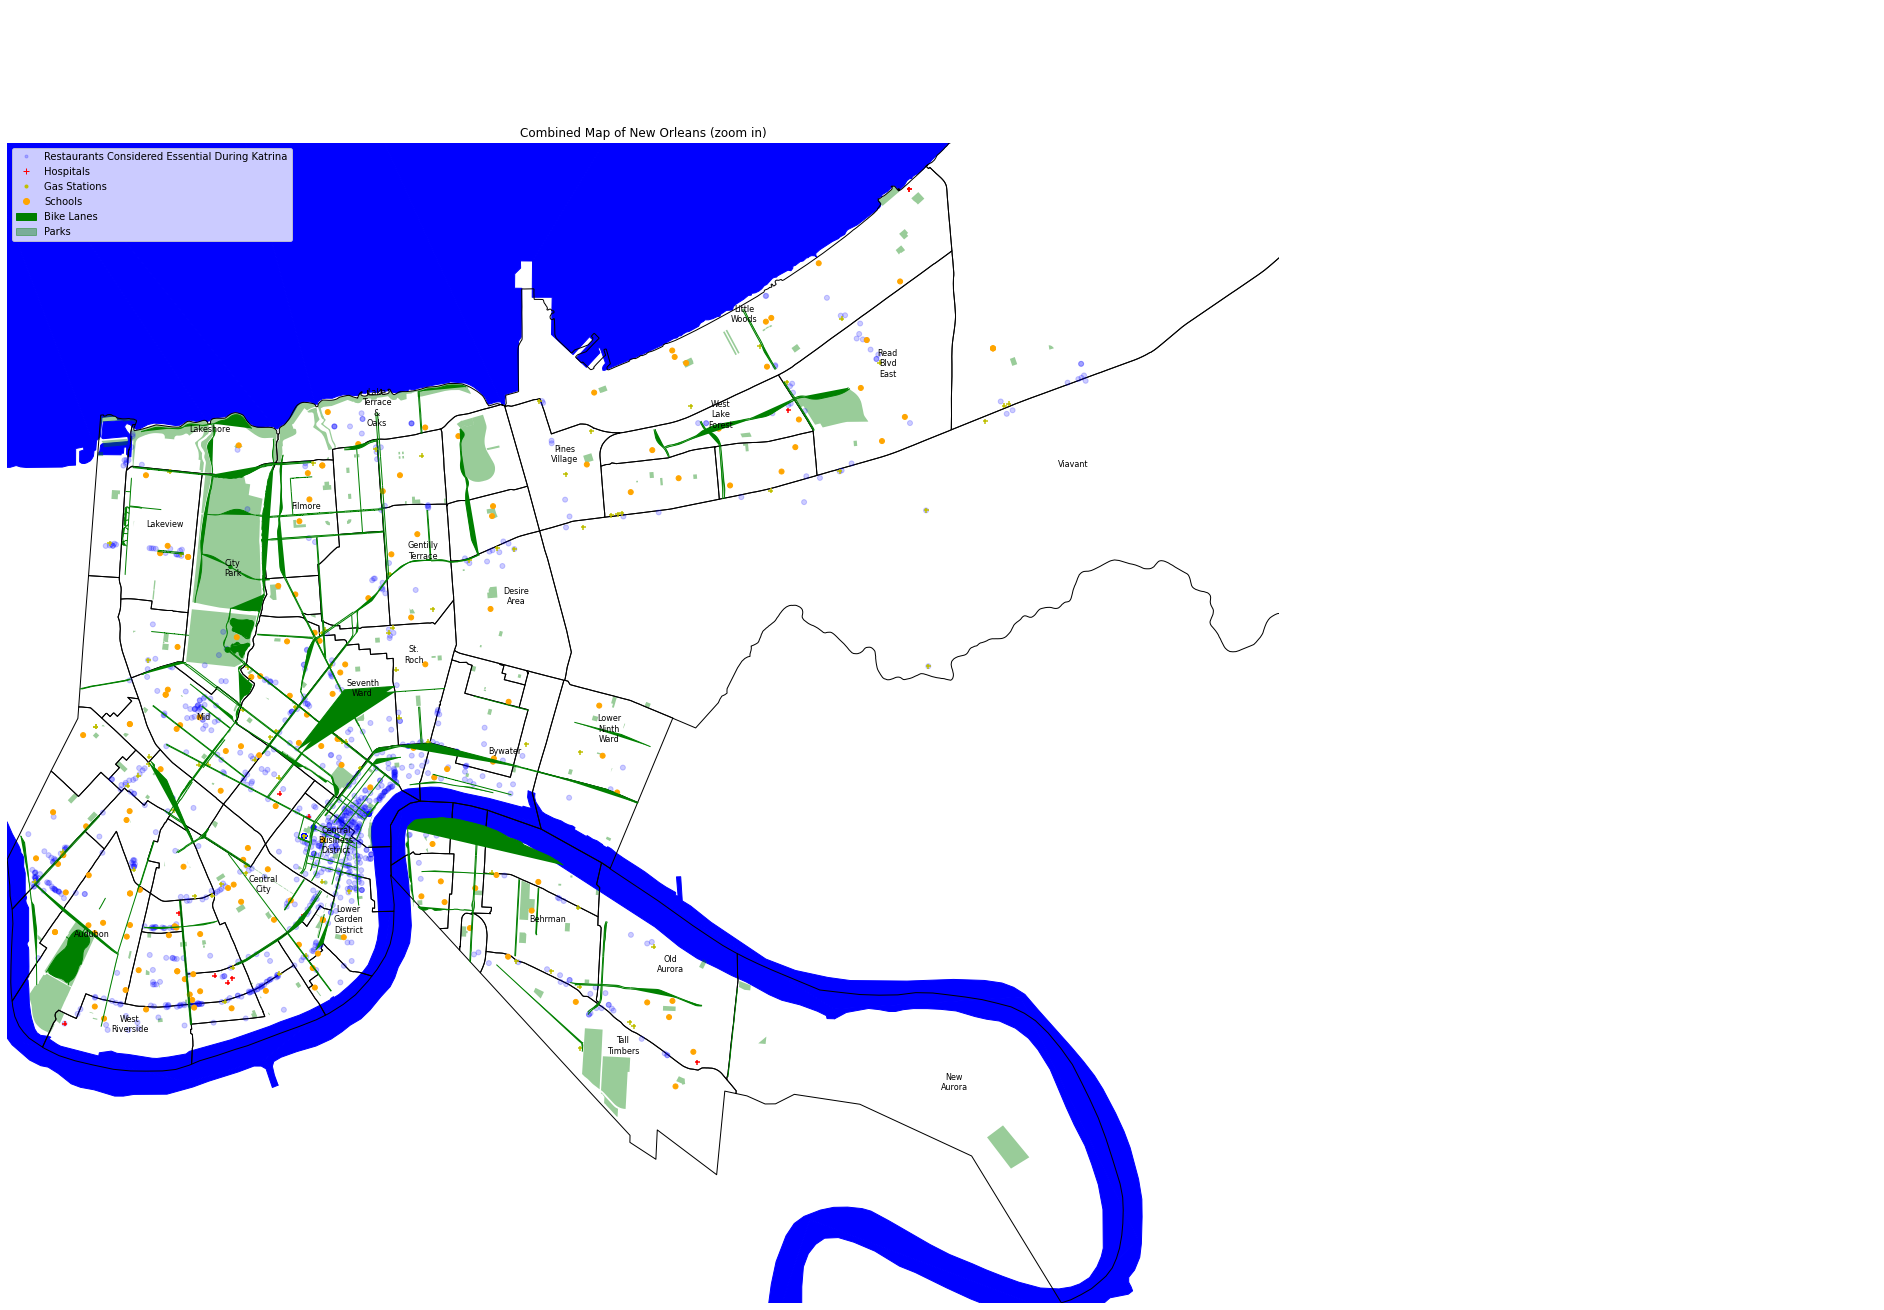

In [12]:
projection = gplt.Mercator() if not webproj else gplt.WebMercator()
fig, ax = plt.subplots(figsize=(28,18), subplot_kw={'projection': projection})

labelMask = neighborhoodDf['Shape_Area'] > 3e7

#extent = neighborhoodDf.total_bounds
extent = (-90.14003111,  29.86560481, -89.87, 30.08)

legendHandles = []

gplt.polyplot(neighborhoodDf,ax=ax, projection=projection, zorder=10, extent=extent)

gplt.pointplot(restaurantsDf,ax=ax,\
               color='b', \
               alpha=0.2,
               projection=projection, zorder=11, extent=extent)
legendHandles.append( \
                    mlines.Line2D([],[],label='Restaurants Considered Essential During Katrina', \
                    color='b', \
                    alpha=0.2,\
                    linestyle='None',\
                    marker='.') )

gplt.pointplot(hospitalsDf,ax=ax,\
               color='r', \
               alpha=1, \
               marker='+',
               projection=projection, zorder=14, extent=extent)
legendHandles.append( \
                    mlines.Line2D([],[],label='Hospitals', \
                    color='r', \
                    alpha=1, \
                    marker='+',\
                    linestyle='None') )

gplt.pointplot(gasStationsDf,ax=ax,\
               color='y', \
               alpha=1, \
               marker='+',
               projection=projection, zorder=12, extent=extent)
legendHandles.append( \
                    mlines.Line2D([],[],label='Gas Stations', \
                    color='y', \
                    alpha=1, \
                    marker='.',\
                    linestyle='None') )

gplt.pointplot(schoolsDf,ax=ax,\
               color='orange', \
               alpha=1, \
               marker='o',
               projection=projection, zorder=13, extent=extent)
legendHandles.append( \
                    mlines.Line2D([],[],label='Schools', \
                    color='orange', \
                    alpha=1, \
                    marker='o',\
                    linestyle='None') )

gplt.polyplot(bikeLanesDf,ax=ax,\
               color='g', \
               alpha=1,
               projection=projection, zorder=15, extent=extent)
legendHandles.append( \
                    mpatches.Patch(label='Bike Lanes', \
                    color='g', \
                    alpha=1) )


if webproj:
    gplt.webmap(neighborhoodDf, projection=projection,ax=ax, extent=extent)

else:
    #show parks if no webmap
    gplt.polyplot(parksDf, edgecolor=None,facecolor='g', \
              alpha=0.4, \
              ax=ax,projection=projection,extent=extent, zorder=9)
    legendHandles.append(\
                         mpatches.Patch(color='g',label='Parks', alpha=0.4) \
                        )
    #show water if not webmap
    gplt.polyplot(waterDf,ax=ax, \
             color='blue',\
             zorder=-5, projection=projection, extent=extent)
    
#labeling handled but web project
for idx,neighborhood in neighborhoodDf[labelMask].iterrows():
    pass
    ax.annotate(text=neighborhood['Name'], xy=(neighborhood['centers'].x,neighborhood['centers'].y), \
               va='center',ha='center', xytext=(-20,-12), textcoords='offset points', fontsize=8, zorder=100)

ax.set_title('Combined Map of New Orleans (zoom in)')
ax.legend(handles=legendHandles, loc='upper left')

fig.tight_layout()

print("Extent:", extent)

In [13]:
def countPoints(poly, points):
    count = 0
    for point in points:
        if poly.contains(point):
            count +=1
    
    return count

def countPointsRestaurants(poly):
    return countPoints(poly,restaurantsDf['geometry'])

neighborhoodDf['Restaurants'] = neighborhoodDf['geometry'].map(countPointsRestaurants)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


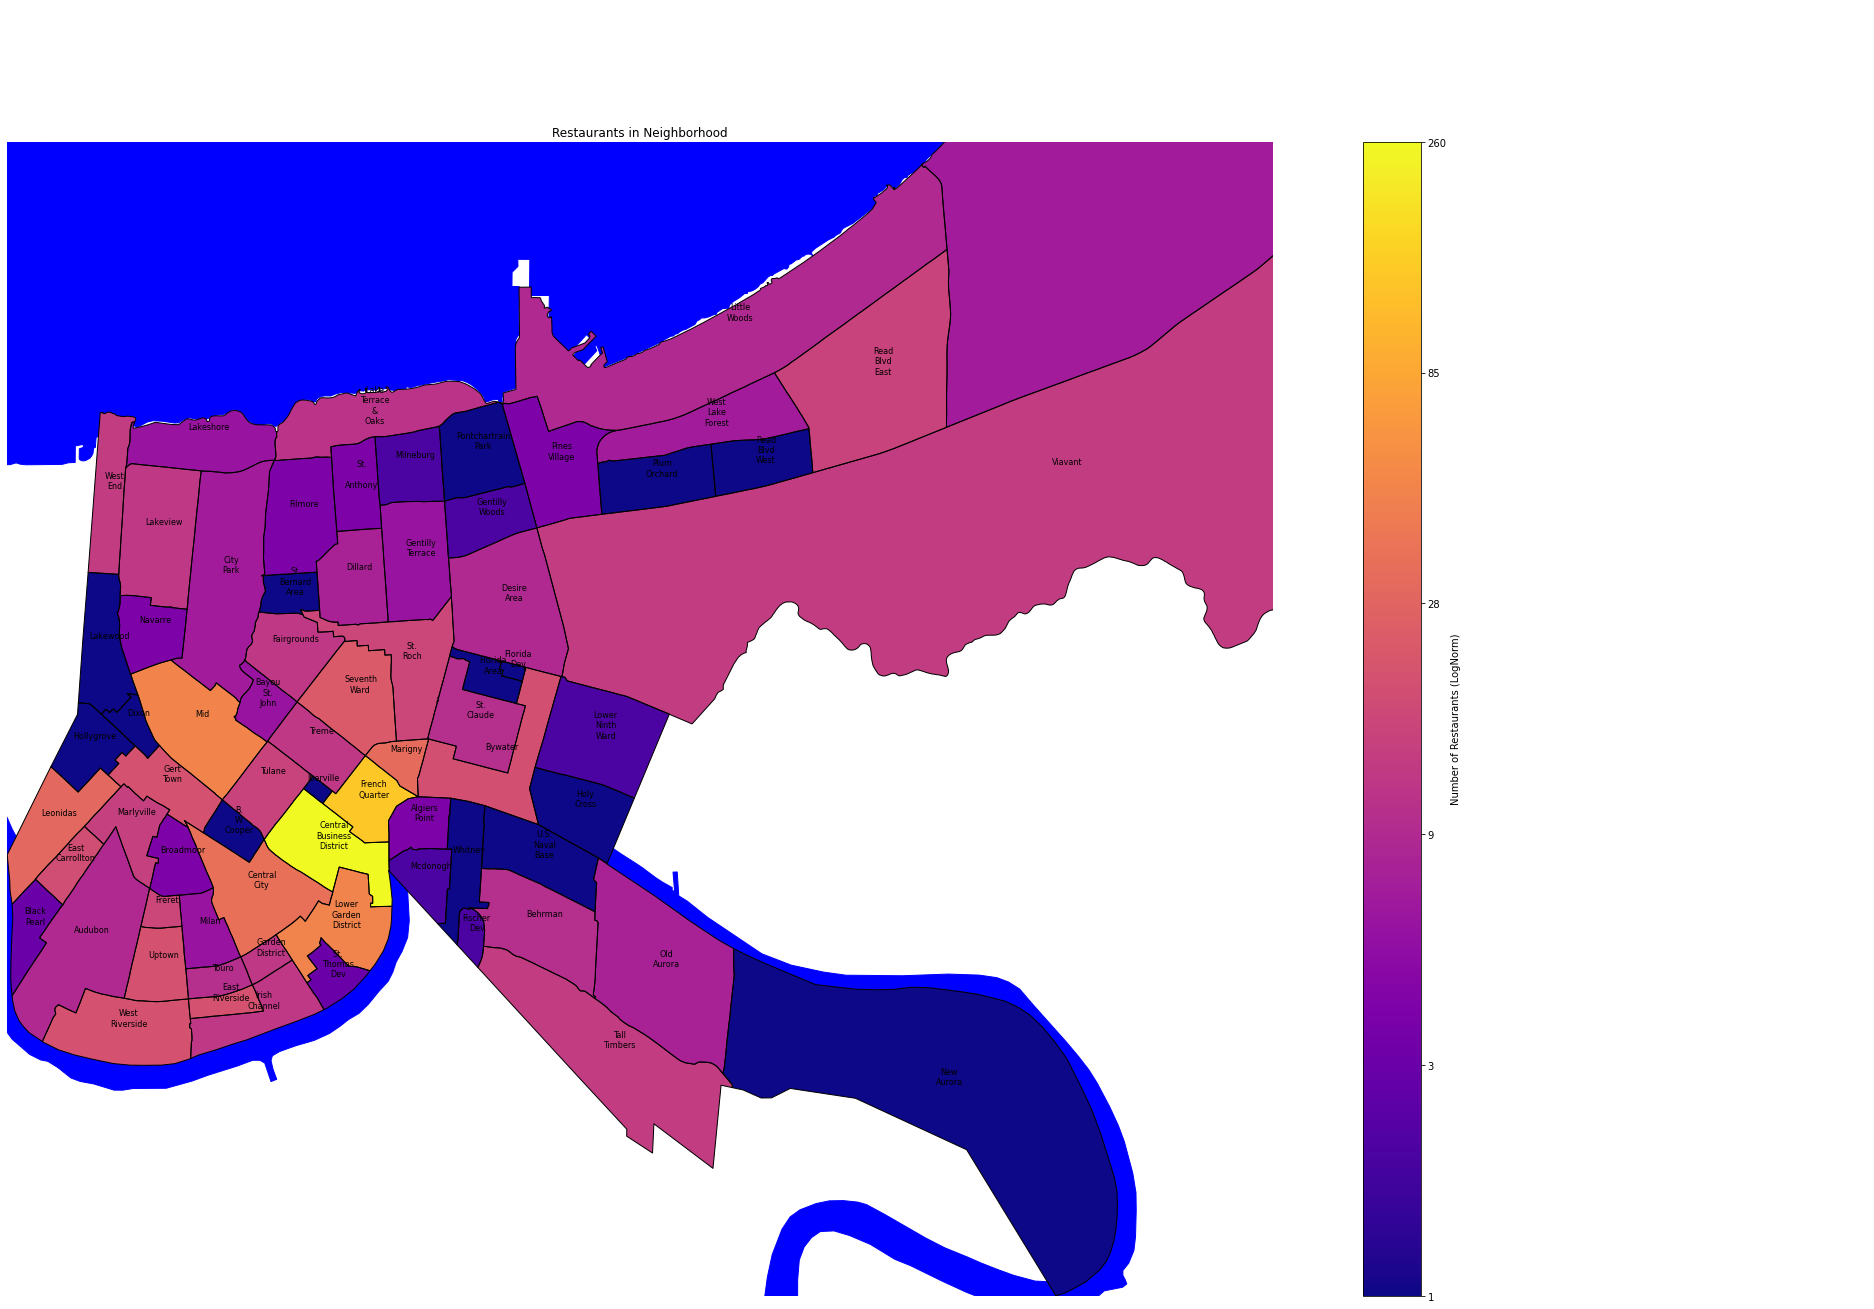

In [59]:
fig, ax = plt.subplots(figsize=(28,18), subplot_kw={'projection': projection})

norm = colors.LogNorm()
neighborhoodDf['RestaurantNorm'] = norm(neighborhoodDf['Restaurants'])


gplt.choropleth(neighborhoodDf, hue='RestaurantNorm',ax=ax,extent=extent,projection=projection, legend=True, cmap='plasma')
gplt.polyplot(neighborhoodDf,ax=ax,extent=extent,projection=projection,zorder=10)    
    
legendHandles = []
if webproj:
    gplt.webmap(neighborhoodDf, projection=projection,ax=ax, extent=extent)

else:
   
    #show water if not webmap
    gplt.polyplot(waterDf,ax=ax, \
             color='blue',\
             zorder=-5, projection=projection, extent=extent)
    
#labeling handled but web project
for idx,neighborhood in neighborhoodDf.iterrows():
    pass
    ax.annotate(text=neighborhood['Name'], xy=(neighborhood['centers'].x,neighborhood['centers'].y), \
               va='center',ha='center', xytext=(-20,-12), textcoords='offset points', fontsize=8, zorder=100)

ax.set_title('Restaurants in Neighborhood')

cbar = fig.get_axes()[-1]
cbar.set_yticklabels([int(x) for x in norm.inverse(test.get_yticks())])
cbar.set_ylabel('Number of Restaurants (LogNorm)')

fig.tight_layout()
